## Purchasing intention
### Projekt zaliczeniowy z przedmiotu Podstawy Uczenia Maszynowego
#### Mateusz Białecki, Mateusz Bereta, Informatyka semestr VI, Wydział Matematyki Stosowanej

In [62]:
import pandas as pd

In [63]:
data = pd.read_csv("online_shoppers_intention.csv")
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Prezentacja zbioru danych

Zbiór danych zawiera 12,330 sesji w sklepach internetowych, 84.5% (10,422) jest negatywnych które nie zakończyły się zakupem w sklepie, a reszta (1908) pozytywnymi które doporwadziły do transakcji.

Zbiór danych składa się z 10 atrybutów liczbowych i 8 atrybutów kategorialnych.

* "Administrative", "Informational" i "Product Related"  - reprezentują liczbę różnych typów stron odwiedzanych przez odwiedzającego w tej sesji
* "Administrative Duration", "Informational Duration" i "Product Related Duration" - reprezentują całkowity czas spędzony na każdej z tych kategorii stron
* "Bounce Rate", "Exit Rate" i "Page Value" - są wartościami z „Google Analytics”. 
    *  "Bounce Rate" - to współczynnik odrzuceń bez zadnych akcji
    *  "Exit Rate" - dla określonej strony internetowej jest obliczana jako dla wszystkich odsłon strony, czyli jako odsetek ostatnich odsłon w sesji. 
    *  "Page Value" - to średnia wartość stron odwiedzonych przed zakończeniem transakcji
* "Special Day" - wskazuje na bliskość czasu odwiedzin strony do szczególnego dnia (np. walentynki) w którym sesje z większym prawdopodbieństwem mogą zostać zakończone transakcją. Walentynki ta wartość przyjmuje wartość niezerową między 2 a 12 lutego, zero przed i po tej dacie, chyba że zbliża się inny dzień specjalny, a jej maksymalna wartość wynosi 1 w dniu 8 lutego.
* "month" - miesiąc sesji
* "operating system", "browser", "region" i "traffic type" - zanonimizowane dane o uzytkowniku
* "visitor type" - przyjmuje wartości Returning_Visitor i New_Visitor
* "weekend" - boolean odpowiadający za to czy sesja odbywała się w weekend
* "renevue" - boolean czy sesja zakończyła się transakcją


In [64]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Omówienie rozwiązywanego problemu

Na podstawie argumentów bazy, opisanych wyżej, chcemy ustalić, czy dana osoba zakupi jakiś produkt czy też nie. Ponadto możemy wyznaczyć najważniejsze czynniki, mające wpływ na zakup. Dzięki temu dział handlowy firmy, która jest właścicielem strony, może podjąć pewne działania, mające szanse na zwiększenie sprzedaży.

### Pierwsza metoda - las losowy

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Wczytanie bazy danych

In [66]:
X = data.drop('Revenue', axis=1)
Y = data['Revenue']


Zamiana kolumn z wartościami tekstowymi na etykiety

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["Month"] = le.fit_transform(X["Month"])
X["VisitorType"] = le.fit_transform(X["VisitorType"])


Podział na zbiór treningowy i testowy

In [68]:
x_train, x_test, y_train,  y_test = train_test_split(X, Y, random_state=12)

Trenowanie modelu. Za ilość liści wybrano 24 po krótkiej serii eksperymentów.

In [87]:
forest = RandomForestClassifier(n_estimators=100,
                                max_leaf_nodes=24,
                                n_jobs=-1,
                                random_state=12)
_ = forest.fit(x_train, y_train)

Sprawdzenie dokładności modelu

In [88]:
forest_train_score = forest.score(x_train, y_train)
forest_test_score = forest.score(x_test, y_test)

print("Las losowy na zbiorze testowym uzyskał dokładność rzędu "
      f"{round(forest_train_score * 100, 2)}%, zaś na zbiorze testowym {round(forest_test_score * 100 ,2)}%")

Las losowy na zbiorze testowym uzyskał dokładność rzędu 91.56%, zaś na zbiorze testowym 90.11%


In [58]:
numbers = np.arange(1, 17)
for number, score in zip(numbers, forest.feature_importances_):
    print(f'{number}.{data.columns[number]}, istotność: {score:.3f}')
print('Posortowane cechy od najmniej do najbardziej istotnej')
print(np.argsort(forest.feature_importances_) + 1)
print('Pięć najbardziej istotnych cech ma łączny wpływ '
      f'{np.sum(np.sort(forest.feature_importances_)[-5:]) * 100.:.3f} % na podjęcie decyzji.')

1.Administrative_Duration, istotność: 0.020
2.Informational, istotność: 0.019
3.Informational_Duration, istotność: 0.002
4.ProductRelated, istotność: 0.007
5.ProductRelated_Duration, istotność: 0.034
6.BounceRates, istotność: 0.069
7.ExitRates, istotność: 0.036
8.PageValues, istotność: 0.075
9.SpecialDay, istotność: 0.688
10.Month, istotność: 0.001
11.OperatingSystems, istotność: 0.036
12.Browser, istotność: 0.000
13.Region, istotność: 0.000
14.TrafficType, istotność: 0.001
15.VisitorType, istotność: 0.003
16.Weekend, istotność: 0.009
Posortowane cechy od najmniej do najbardziej istotnej
[17 12 13 14 10  3 15  4 16  2  1  5  7 11  6  8  9]
Pięć najbardziej istotnych cech ma łączny wpływ 90.442 % na podjęcie decyzji.


Macierz pomyłek modelu

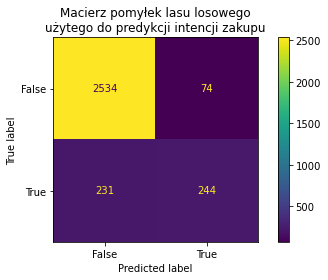

In [91]:
plot = plot_confusion_matrix(forest, x_test, y_test)
plot.ax_.set_title('Macierz pomyłek lasu losowego\nużytego do predykcji intencji zakupu')
plt.tight_layout()

### Druga metoda - Naiwna klasyfikacja Bayesowska

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
#przygotowanie danych do uczenia
dataArray = data.to_numpy()
encoder = OneHotEncoder(sparse=False)

X = dataArray[:, :-1]
# One Hot na 7 ostatnich kolumnach (Month	OperatingSystems	Browser	Region	TrafficType	VisitorType	Weekend)
X_transformed = encoder.fit_transform(X[:, 10:17])
# połączenie One Hot z pozostałymi danymi
X = np.c_[np.delete(X, np.s_[10:17], axis=1),X_transformed]

y = dataArray[:, -1].astype(np.bool8)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2)
#Klasyfikacja
classifier = GaussianNB()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)             


0.7431738307650716

In [60]:
pd.DataFrame(y_test)

,0
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,False
3696,False
3697,False


### Podsumowanie

Oba modele uzyskały skuteczność większą niż 70%. Zauważalnie lepszy jednak okazał się model lasu losowego, uzyskujący 